This project is heavily but not entirely based on the Eduregard tutorial with the 'notebook title' name.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/headbrain/headbrain.csv


In [2]:
#importing other necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0) #for changing the figure size parameter of the plot

#reading the data
data = pd.read_csv('../input/headbrain/headbrain.csv')
print(data.shape) #print the dimensions of the data matrix (height, width)
data.head() #show the first 5 values of the data

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Remember we are trying to see if brain weight **DEPENDS** on head size. So brain weight is **dependent** and head size is **independent**.

In [3]:
#collecting X(independent var) and Y(dependent variable)
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# LEAST SQAURE METHOD - *finding the best fit line*

Linear Regression Model Formular:

ȳ = mx̅ + c

where; *m* = Σ((x-x̅)(y-ȳ)) / Σ(x-x̅)²

Using *m* for in the least square method, we can find the best fitting line, the regression line.

In [4]:
#finding mean ȳ and mean x̅
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X) #total number of values in x; used in the for loop

#using the formular, let's find m
numer = 0
denum = 0

for i in range(n):
    numer = (X[i] - mean_x) * (Y[i] - mean_y) + numer
    denum = ((X[i] - mean_x) ** 2) + denum
m = numer / denum
print (m)

0.26342933948939945


Using the just calculated m, we can now find c by changing the subject of the linear formular

c = ȳ - mx̅

In [5]:
#finding c
c = mean_y - (m * mean_x)
print("c is equal to", c, "and m is equal to", m)

c is equal to 325.57342104944223 and m is equal to 0.26342933948939945


Now it's time to visualize the algorithm on a plot graph

In [6]:
#plotting values and regression line
#setting the limits of the x and y axis of the plot, the 100 is added to make all the points visible
max_x = np.max(X) + 100 
min_x = np.min(X) - 100

#make a linear space of 1000 evenly spaced numbers from min_x to max_x
x = np.linspace(min_x, max_x, 1000) #this is used to plot the x axis of the regression line
y = c + (m * x) #this is used to plot the y axis of the regression line

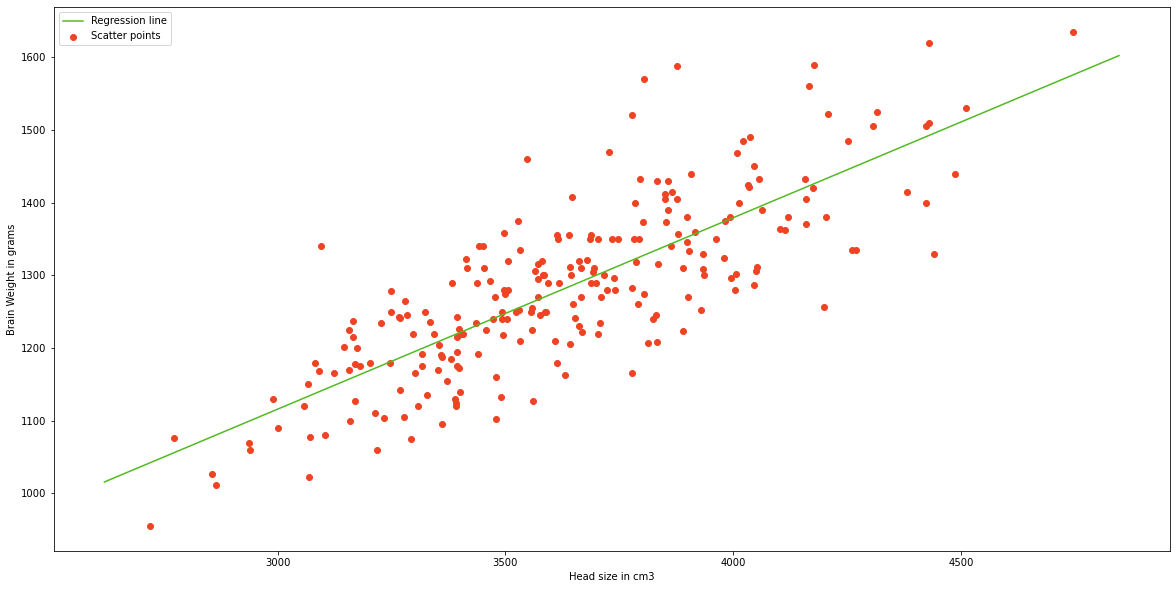

In [7]:
#plotting Scatter points
plt.scatter(X, Y, color='#ef4423', label='Scatter points')
#plotting line
plt.plot(x, y, color='#52b920', label='Regression line')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# R-SQUARED METHOD - *goodness of fit*

By definition, this is the measure of how close the data are fitted to the regression line.
By formular; 
    R² = 1 - (Σ(y-yₚ)²) / (Σ(y-ȳ)²)

In [8]:
ss_denum = 0
ss_numer = 0
for i in range(n): #n is the len of X from above
    y_pred = (m * X[i]) + c
    ss_numer += (Y[i] - y_pred) ** 2
    ss_denum += (Y[i] - mean_y) ** 2
r_squared = 1 - (ss_numer / ss_denum)
print(r_squared * 100, "percent")

63.93117199570003 percent


# SCIKIT LEARN IMPLEMENTATION

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = X.reshape(n, 1) #we cannot use rank 1 matrices in sklearn so we reshape

#model definition
brain_model = LinearRegression()

#model fitting
brain_model.fit(X, Y)

#model prediction
pred = brain_model.predict(X)

#model evaluation
r_squared_score = r2_score(Y, pred)

print((r_squared_score * 100), "percent")

63.9311719957 percent


As you can see, it is a perfect replication of what was built from scratch.
There you have it, **linear regression from scratch** 